
# Diseño de software para cómputo científico

----

## Unidad 4: Optimización, paralelismo, concurrencia y cómputo distribuido en alto nivel.


### Agenda de la Unidad 4
---

- **Optimización y Optimización prematura. Cuellos de botella, Legibilidad vs. Optimización.**
- Profiling.
- Compiladores justo a tiempo (numba).
- Multithreading.
- Paralelismo.
- Concurrencia.
- Cómputo distribuido con Dask.

## Optimización de programas

- En informática, la optimización de programas o la optimización de software es 

> El proceso de modificación de un sistema de software para que algún aspecto funcione de manera más eficiente o use menos recursos. 

- En general, un programa de computadora puede optimizarse para que se ejecute más rápidamente, o para que sea capaz de operar con menos almacenamiento de memoria u otros recursos, o consuma menos energía.
- A menudo, no existe un diseño de "talla única" que funcione bien en todos los casos, por lo que se hacen conseciones para optimizar los atributos de mayor interés.

## Strength reduction

- En la construcción del compilador, la reducción de la resistencia es una optimización del compilador donde las operaciones costosas se reemplazan por operaciones equivalentes pero menos costosas. 
- El ejemplo clásico de reducción de fuerza convierte las multiplicaciones "fuertes" dentro de un bucle en adiciones "más débiles".
- Fragmento de código C cuya intención es obtener la suma de todos los enteros de 1 a N (No se asume overflows):

```c
int i, sum = 0;
for (i = 1; i <= N; ++i) {
  sum += i;
}
printf("sum: %d\n", sum);
```

```c
int sum = N * (1 + N) / 2;
printf("sum: %d\n", sum);
```



## Niveles de optimización

- La optimización puede ocurrir en varios niveles. Por lo general, los niveles más altos tienen un mayor impacto y son más difíciles de cambiar más adelante en un proyecto, lo que requiere cambios significativos o una reescritura completa si es necesario cambiarlos. 
- Por lo tanto, la optimización generalmente puede realizarse mediante un refinamiento de mayor a menor, con ganancias iniciales mayores y logradas con menos trabajo, y ganancias posteriores más pequeñas y que requieren más trabajo. 
- En algunos casos, el rendimiento general depende del rendimiento de porciones de muy bajo nivel de un programa, y los pequeños cambios en una etapa tardía o la consideración temprana de los detalles de bajo nivel pueden tener un impacto descomunal. 


### Niveles de optimización - Design level

- El diseño arquitectónico de un sistema afecta abrumadoramente su rendimiento. Un sistema que está vinculado a la latencia de la red (donde la latencia de la red es la principal restricción) se optimizaría para minimizar los viajes de red.
- La elección del diseño depende de los objetivos: al diseñar un compilador, si la compilación rápida es la prioridad clave, un compilador de una pasada es más rápido que un compilador de varias pasadas, pero si el objetivo es la velocidad del código de salida, Un compilador más lento de múltiples pasadas cumple mejor el objetivo.
- La elección de la plataforma y el lenguaje de programación se producen en este nivel, y cambiarlos con frecuencia requiere una reescritura completa, aunque un sistema modular puede permitir la reescritura de solo algunos componentes; por ejemplo, un programa Python puede reescribir secciones críticas para el rendimiento en C. 

### Niveles de optimización - Algorithms and data structures

- Después del diseño, la elección de algoritmos y estructuras de datos afecta la eficiencia más que cualquier otro aspecto del programa. 
- En general, las estructuras de datos son más difíciles de cambiar que los algoritmos, ya que una suposición de estructura de datos y sus suposiciones de rendimiento se utilizan en todo el programa.
- Consiste principalmente en asegurar que los algoritmos sean $O(1)$ constante, O logarítmico $O(log n)$, O lineal $O(n)$ o, en algunos casos, log lineal $O(n log n)$ tanto en el espacio como en tiempo). 
- Los algoritmos con complejidad cuadrática $O(n^2)$ no escalan, e incluso los algoritmos lineales causan problemas si se llaman repetidamente.
- Una técnica general para mejorar el rendimiento es evitar el trabajo. 
    - Por ejemplo es el uso de *fast-path* para casos comunes.
    - Otra técnica es caché, en particular *memoization* que evita cálculos redundantes. 

### Niveles de optimización - Source code

- Las elecciones concretas de nivel de código fuente pueden marcar una diferencia significativa. 
- Por ejemplo, en Python las listas por comprension suelen ser mas rapidad que los *for-loops*. 
- Algunas optimizaciones (como esta) se pueden realizar hoy en día mediante la optimización de compiladores. - 
- Este es un lugar clave donde la comprensión de los compiladores y el código de la máquina puede mejorar el rendimiento. 
- El movimiento de código invariante fuera de un bucle y la optimización del valor de retorno son ejemplos de optimizaciones que reducen la necesidad de variables auxiliares e incluso pueden dar como resultado un rendimiento más rápido al evitar optimizaciones redondas.
- Más ejemplos: https://stackabuse.com/python-performance-optimization/

### Niveles de optimización - Build level

- Entre el nivel fuente y el nivel de compilación, las directivas y los flags de compilación se pueden usar para ajustar las opciones de rendimiento en el código fuente y el compilador respectivamente, como el uso de definiciones de preprocesador para deshabilitar funciones de software innecesarias. 
- La optimización para modelos de procesador específicos o capacidades de hardware, o la predicción de ramificaciones, por ejemplo. Los sistemas de distribución de software basados en la fuente, como los ports de BSD y el Portage de Gentoo, pueden aprovechar esta forma de optimización.

### Nivel de compilación

- El uso de un compilador optimizado tiende a garantizar que el programa ejecutable se optimice al menos tanto como el compilador pueda predecir su funcionamiento.

### Niveles de optimización - Assembly level

- En el nivel más bajo, escribir código usando un lenguaje ensamblador, diseñado para una plataforma de hardware particular puede producir el código más eficiente y compacto si el programador aprovecha el repertorio completo de instrucciones de la máquina.
- Dado los compiladores modernos y la mayor complejidad de las CPU recientes, es más difícil escribir código más eficiente que el que genera el compilador, y pocos proyectos necesitan este paso de optimización "definitivo".
- Normalmente, en lugar de escribir en lenguaje ensamblador, los programadores usarán un desensamblador para analizar la salida de un compilador y cambiar el código fuente de alto nivel para que pueda compilarse de manera más eficiente, o entiendan por qué es ineficiente.

### Niveles de optimización - Run-Time


- Los compiladores justo a tiempo (JIT) pueden producir código de máquina personalizado basado en datos de tiempo de ejecución, a costa de la sobrecarga de la compilación. 
- En algunos casos se puede realizar una optimización  que excede la capacidad de los compiladores estáticos.
- La optimización guiada por profiling  es una técnica de optimización de compilación anticipada (AOT) basada en perfiles de tiempo de ejecución, y es similar a un análogo estático de "caso promedio" de la técnica dinámica de optimización adaptativa.
- Algunos diseños de CPU pueden realizar algunas optimizaciones en tiempo de ejecución. Algunos ejemplos incluyen ejecución fuera de orden, ejecución especulativa, canalizaciones de instrucciones y predictores de rama. 

## Compensaciones

- La optimización se basa en el uso de algoritmos más elaborados, haciendo uso de "casos especiales" realizando complejas compensaciones. 
- Un programa "optimizado" puede ser más difícil de comprender y, por lo tanto, puede contener más fallas que las versiones no optimizadas. 
- Algunas optimizaciones de nivel de código disminuyen la capacidad de mantenimiento.
- La optimización generalmente se centrará en mejorar solo algunos aspectos:
    - tiempo de ejecución.
    - uso de memoria.
    - espacio en disco.
    - ancho de banda.
    - o algún otro recurso. 
    
- Esto generalmente que un factor se optimice a expensas de otros. 
- Por ejemplo, más memoria caché mejora el rendimiento del tiempo de ejecución, pero también aumenta el consumo de memoria.

## Compensaciones

- Hay casos en los que el programador que realiza la optimización debe decidir mejorar el software para algunas operaciones, pero a costa de hacer que otras operaciones sean menos eficientes. 
- Estas compensaciones a veces pueden ser de naturaleza no técnica, como cuando un competidor ha publicado un resultado de referencia que debe superarse para mejorar el éxito comercial, pero tal vez conlleva que el uso normal del software sea menos eficiente. 
- Tales cambios a veces se denominan en broma **pessimizations**.

## Bottlenecks

- Un cuello de botella en un sistema, es un componente que es el factor limitante en el rendimiento.
- En ciencias de la computación, el consumo de recursos a menudo sigue una forma de distribución de power-law, y el principio de Pareto se puede aplicar a la optimización de recursos. 
- En ingeniería de software, a menudo es una mejor aproximación que el 90% del tiempo de ejecución de un programa de computadora se gasta ejecutando el 10% del código (conocido en este contexto como la ley 90/10).
- Los algoritmos más complejos y las estructuras de datos funcionan bien con muchos elementos, mientras que los algoritmos simples son más adecuados para pequeñas cantidades de datos
- El tiempo de inicialización y los factores constantes del algoritmo más complejo pueden superar su beneficio 
- Un algoritmo híbrido o adaptativo suele ser la solución. 
- En algunos casos, agregar más memoria puede ayudar a que un programa se ejecute más rápido. 
    - Por ejemplo, un programa de filtrado leerá comúnmente cada línea y filtrará y generará esa línea inmediatamente. Esto solo usa suficiente memoria para una línea, pero el rendimiento suele ser deficiente, debido a la latencia de cada lectura de disco.

## Cuando optimizar


Donald Knuth (o Tony Hoare) hizo las siguientes dos declaraciones sobre optimización:

> Deberíamos olvidarnos de las pequeñas eficiencias, digamos alrededor del 97% del tiempo: la optimización prematura es la raíz de todo mal. Sin embargo, no debemos dejar pasar nuestras oportunidades en ese crítico 3%

> En las disciplinas de ingeniería establecidas, una mejora del 12% obtenida fácilmente, nunca se considera marginal y creo que el mismo punto de vista debería prevalecer en el software" 

"Optimización prematura" es una frase utilizada para describir una situación en la que un programador permite que las consideraciones de rendimiento afecten el diseño de un fragmento de código. 

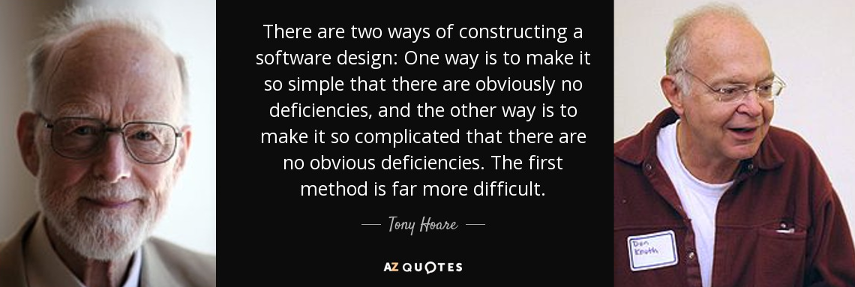

## Cuando optimizar

Al decidir si optimizar una parte específica del programa, siempre se debe considerar la Ley de Amdahl: el impacto en el programa general depende en gran medida de cuánto tiempo se dedica realmente a esa parte específica, lo que no siempre está claro al mirar el código sin un análisis de desempeño.

Por lo tanto, un mejor enfoque es diseñar primero, codificar desde el diseño y luego perfilar / comparar el código resultante para ver qué partes deben optimizarse. Un diseño simple y elegante a menudo es más fácil de optimizar en esta etapa, y la creación de perfiles puede revelar problemas de rendimiento inesperados que no habrían sido abordados por la optimización prematura.

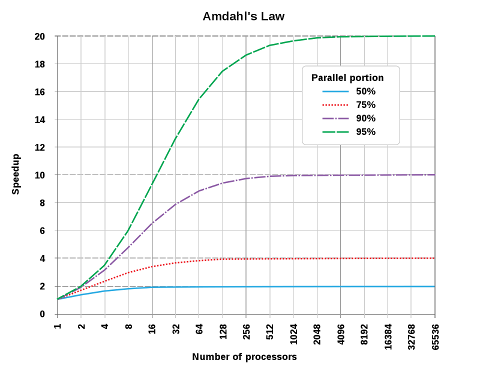

## Tiempo necesario para la optimización.

- A veces, el tiempo necesario para llevar a cabo la optimización en sí mismo puede ser un problema.
- La optimización del código existente generalmente no agrega nuevas características y, lo que es peor, podría agregar nuevos errores en el código que funcionaba anteriormente.
- Debido a que el código optimizado manualmente a veces puede tener menos "legibilidad" que el código no optimizado, la optimización también puede afectar el mantenimiento del mismo. 
- La optimización tiene un precio y es importante asegurarse de que la inversión valga la pena.

## Bueno... todo esto al final es muy mala idea

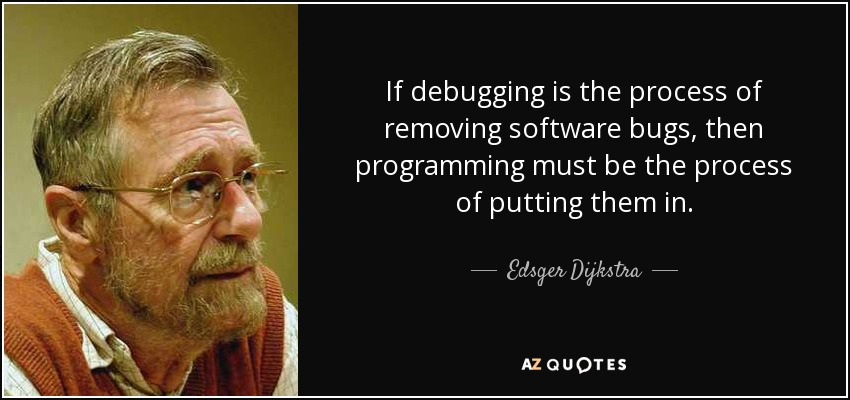

## Referencias

- https://en.wikipedia.org/wiki/Program_optimization
- https://en.wikipedia.org/wiki/Strength_reduction
- https://stackabuse.com/python-performance-optimization/